<TransferFunction>: sys[7]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

      1.523
  -------------
  s^2 + 7.143 s


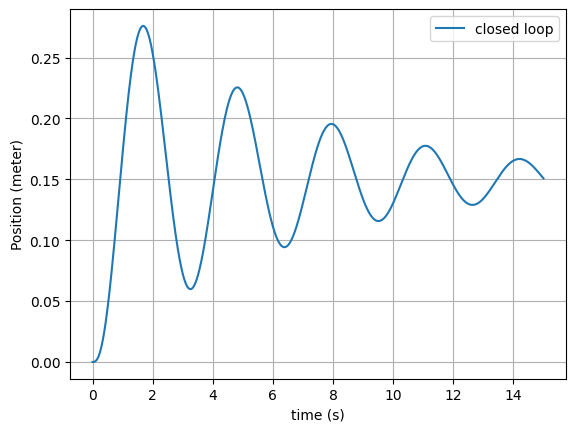

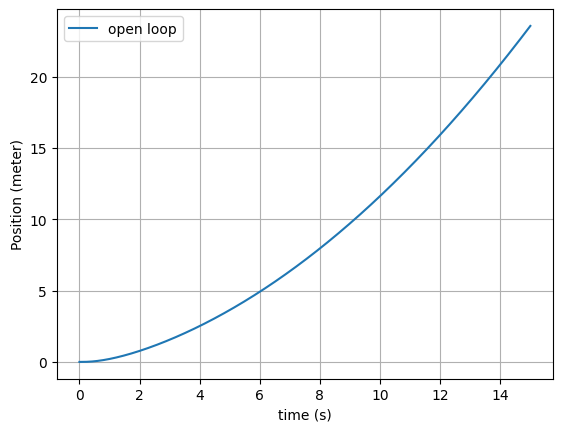

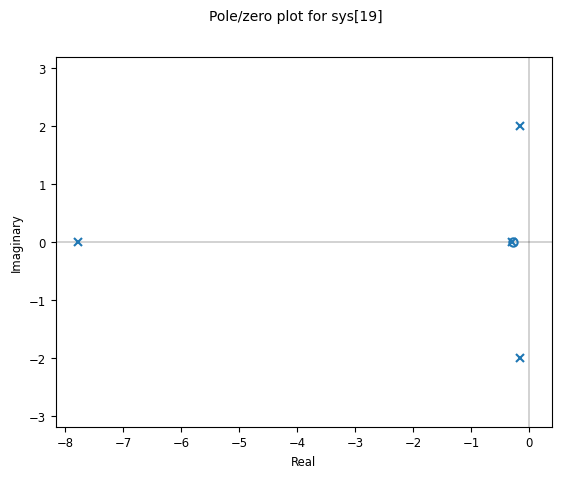

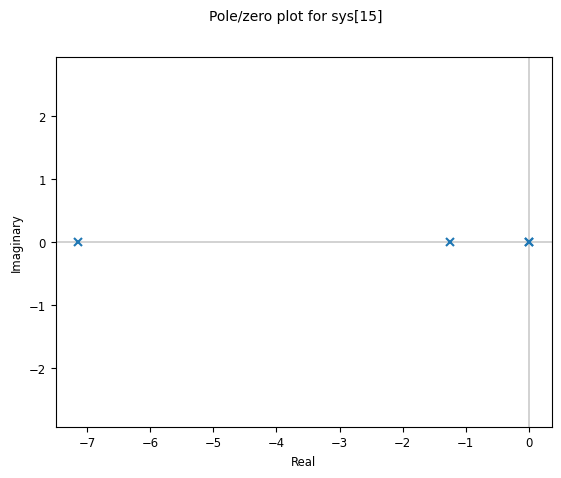

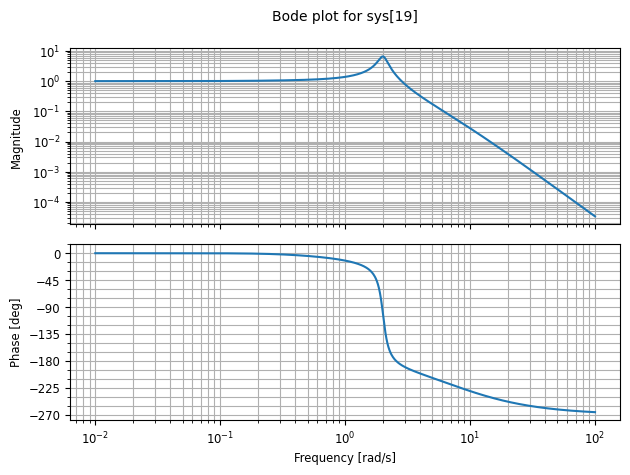

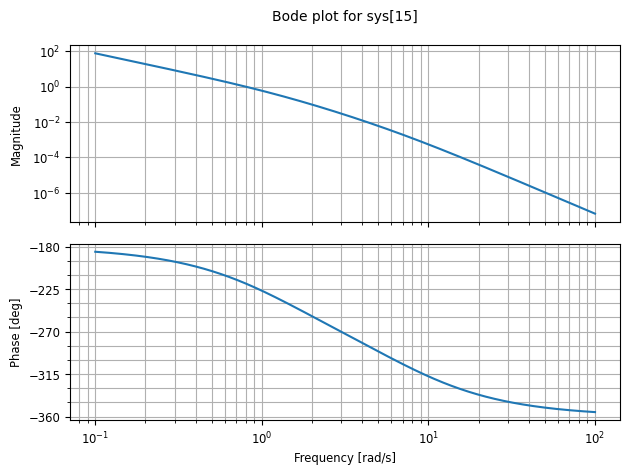

In [1]:
import array
import control as ctl
import numpy as np
from control import *
import matplotlib.pyplot as plt

g = 9.81
d = 0.0375
L = 0.1725
b = 0.01 # changes things significantly
m = 0.05 # weight of ball
R = 0.02

s = ctl.TransferFunction.s

K = 4.4
T = 0.8

Kp = 1.4
Ki = 0
Kd = 5

H_pid = Kp + Ki/s + Kd*s

num = [(5/7)*g*(d / L)]
den = [1, (5/7)*(b / (R*m)), 0]

H_sys = tf(num, den)
print(H_sys)

integrator = 1/s
H_motorspeed = (K/(s+(1/T)))
H_motorposition = integrator * H_motorspeed

H_openloop = H_sys*H_motorposition
H_total = H_sys*H_motorposition*H_pid

H_closedloop = feedback(H_total, 1)

t = np.linspace(0, 15, 1000)

setpoint = 0.15

r = np.ones_like(t) * setpoint # give array of 30 times[setpoint]

t, y = forced_response(H_closedloop, T = t, U = r)
t2, y2 = forced_response(H_total, T = t, U = r)

plt.figure()
plt.plot(t,y, label='closed loop')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('Position (meter)')
plt.legend()

plt.figure()
plt.plot(t2,y2, label='open loop')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('Position (meter)')
plt.legend()

plt.figure()
pole_zero_plot(H_closedloop)

plt.figure()
pole_zero_plot(H_openloop)

plt.figure()
bode_plot(H_closedloop, Hz = False)

plt.figure()
bode_plot(H_openloop, Hz = False)

In [44]:
import array
import control
import numpy as np
from control import *
import matplotlib.pyplot as plt


g = 9.81
d = 0.0375
L = 0.1725
b = 0.001 # total guess
m = 0.05 # weight of ball
R = 0.02

num = [5/7*g*(d/L)] # this technically makes the tf x/alpha, with alpha equals the angle of the motor, not that of the beam.
# num = [-5/7*g] # this equals tf = x/theta, the angle of the beam
den = [1, (5*b)/(7*m*R), 0]

G_plant = tf(num, den)
print(G_plant)

# step response and pulse response:
step = tf([1],[1,0])
Y_step = G_plant * step
pulse = tf([1],[1])
Y_pulse = G_plant * step

f = 1 # frequency
a =  2*np.pi*f # angular frequency
cos = tf([1,0],[1,0,a**2])
Y_cosine = G_plant * cos

sin = tf([a],[1,0,a**2])
Y_sine = G_plant * sin


#open loop response = the system's output behavior without any feedback, measured after a step change in the systems input (= at the controller's output )
t,y = step_response(G_plant,T=1,T_num=200, X0=0)     #X0 can be set as initial condition
y_angle = y*(np.pi/12) # change to whatever angle we want to try as a step.
t2,yc = impulse_response(G_plant,T=5,T_num=1000)
# t3,yc2 = impulse_response(Y_sine, T=5, T_num=1000)
t4,yc3 = impulse_response(Y_cosine, T=5, T_num=1000)
yc2 = yc2 * (np.pi/12)
# plt.plot(t3,yc2, label='Sine response -  open loop')
plt.plot(t4,yc3, label='Cosine response -  open loop')

plt.plot(t,y_angle, label='Step response - open loop')
# plt.plot(t2,yc, label='Impulse response -  open loop')

plt.grid()
plt.xlabel('time (s)')
plt.ylabel('Position (meter)')
plt.legend()

# w = np.logspace(-1,3,100)   #set omega range
# bode_plot(G_plant,w,deg=True,Hz=False)


<TransferFunction>: sys[877]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

      1.523
  --------------
  s^2 + 0.7143 s


NameError: name 'yc2' is not defined

<TransferFunction>: sys[2493]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

      5
  ---------
  s + 6.614
<TransferFunction>: sys[2495]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  -------------
  s^2 + 6.614 s


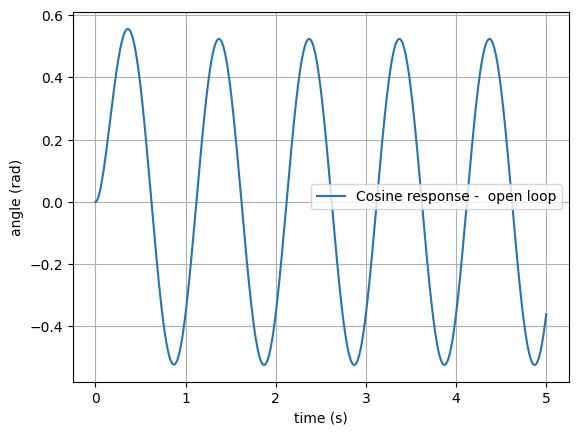

In [202]:
import array
import control
import numpy as np
from control import *
import matplotlib.pyplot as plt

K =5 # experimental lol
T_m = 0.1512 # 0.1512

num = [K]
den = [1,1/T_m]

G_motor = tf(num, den)
print(G_motor)
integrator = tf([1],[1,0]) # integrator
G_motor = G_motor*integrator # integrate to get position
print(G_motor)

# step response and pulse response:
step = tf([1],[1,0]) # figire out of numerator value matters.
Y_step = G_motor * step
pulse = tf([1],[1])
Y_pulse = G_motor * step

f = 1 # frequency
a =  2*np.pi*f # angular frequency
cos =  tf([1,0],[1,0,a**2])
Y_cosine = G_motor * cos
sine = tf([a],[1,0,a**2])
Y_sine = G_motor * sine


#open loop response = the system's output behavior without any feedback, measured after a step change in the systems input (= at the controller's output )
t,y = step_response(G_motor,T=5,T_num=1000, X0=0)     #X0 can be set as initial condition
t2,yc = impulse_response(G_motor,T=5,T_num=1000)
t4,yc3 = impulse_response(Y_cosine, T=5, T_num=1000)
t3,yc2 = impulse_response(Y_sine, T=5, T_num=1000)

yc3 = yc3 * 6

plt.plot(t4,yc3, label='Cosine response -  open loop')
# plt.plot(t3,yc2, label='Sine response -  open loop')
# plt.plot(t,y, label='Step response - open loop')
# plt.plot(t2,yc, label='Impulse response -  open loop')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('angle (rad)')
plt.legend()


G_total = G_plant*G_motor <TransferFunction>: sys[2512]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

            -7.616
  ---------------------------
  s^4 + 7.328 s^3 + 4.724 s^2
G_cosine =  <TransferFunction>: sys[2518]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                       -7.616 s
  --------------------------------------------------
  s^6 + 7.328 s^5 + 44.2 s^4 + 289.3 s^3 + 186.5 s^2
G_sine =  <TransferFunction>: sys[2520]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                        -47.86
  --------------------------------------------------
  s^6 + 7.328 s^5 + 44.2 s^4 + 289.3 s^3 + 186.5 s^2


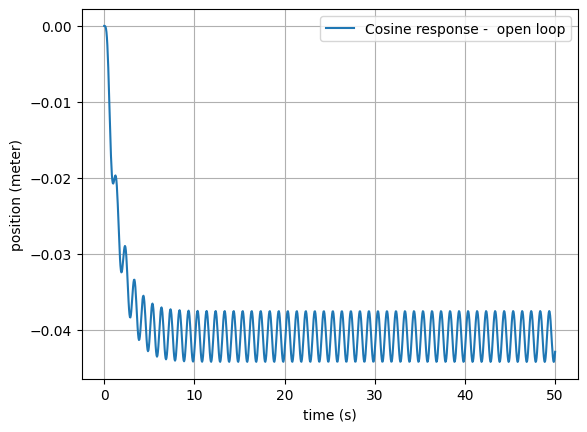

In [ ]:
import array
import control
import numpy as np
from control import *
import matplotlib.pyplot as plt


# open loop plant+motor
G_total = G_plant*G_motor
print('G_total = G_plant*G_motor', G_total)
# maybe add response step, pulse, with/without IC

# step response and pulse response:
step = tf([1],[1,0])
Y_step = G_total * step
pulse = tf([1],[1])
Y_pulse = G_total * step


f = 1 # frequency
a =  2*np.pi*f # angular frequency
cos = tf([1,0],[1,0,a**2]) # scale sine by a factor np.pi/12
Y_cosine = G_total * cos
print('G_cosine = ', Y_cosine)

sine = tf([a],[1,0,a**2])
Y_sine = G_total * sine
print('G_sine = ', Y_sine)


#open loop response = the system's output behavior without any feedback, measured after a step change in the systems input (= at the controller's output )
t,y = step_response(G_total,T=1,T_num=1000, X0=0)#X0 can be set as initial condition

t4,yc3= impulse_response(Y_cosine, T=50, T_num=1000)
t3,yc2 = impulse_response(Y_sine, T=50, T_num=1000)

# plt.plot(t4,yc3, label='Cosine response -  open loop')
# plt.plot(t3,yc2, label='Sine response -  open loop')

# y_pos = y*6 # scaled by 6 for a 6v step ?
# t2,yc = impulse_response(G_total,T=1,T_num=200)
# plt.plot(t,y_pos, label='Step response - open loop')
# plt.plot(t2,yc, label='Impulse response -  open loop')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('position (meter)')
plt.legend()






PID =  <TransferFunction>: sys[2569]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  s
  -
  s
cl dc gain =  nan
ol dc gain =  -inf
closed loop poles =  [-6.64286986+0.j         -0.75152045+0.91493555j -0.75152045-0.91493555j
  0.81786843+0.j          0.        +0.j        ]
open loop poles =  [-6.61375661+0.j -0.71428571+0.j  0.        +0.j  0.        +0.j]


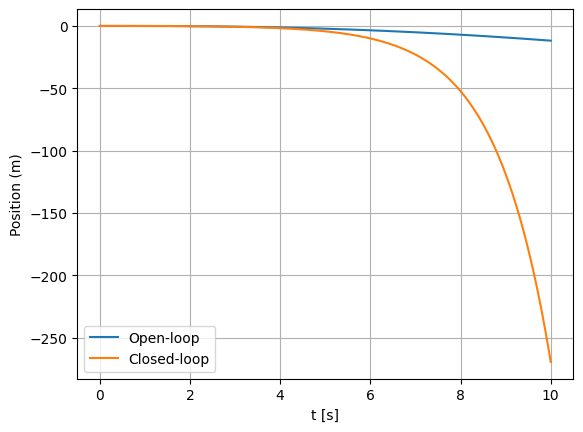

: 

In [ ]:
# add PI controller (now it is closed loop)
Kp,Ki,Kd=1.0,0.0,0.0 # idk if this way of defining is allowed. d = 0 because otherwise deg(num) > deg(den)
den = [1, 0]
controller= tf([Kd,Kp,Ki],den)
print('PID = ', controller)

G_control = controller*G_total

G_controlled = feedback(G_control,[1])  #GF is forward gain, [1] is unity feedback loop with -1 indicating negative feedback

# print('G_controlled = ', G_controlled)

# t, y = step_response(5 * G_controlled, t)

# w = np.logspace(-1,3,100)   #set omega range
# bode_plot(G_controlled,w,dB=True,deg=False)
poles1 = G_controlled.poles()

poles2 = G_total.poles()

print ('cl dc gain = ', dcgain(G_controlled))
print ('ol dc gain = ', dcgain(G_total))

print('closed loop poles = ', poles1)
print('open loop poles = ', poles2)

t2, yc = step_response(0.2*G_controlled,T=10,T_num=1000,X0=-0.0)
t, y = step_response(0.2*G_total,T=10,T_num=1000,X0=0)  
plt.plot(t,y, label='Open-loop')
plt.plot(t2,yc, label='Closed-loop')
plt.grid()
plt.xlabel('t [s]')
plt.ylabel('Position (m)')
plt.legend()

#impulse_response(g,T=10,T_num=200)




# TODO add bode plots and pole zero plot at what places?